<a href="https://colab.research.google.com/github/0DianaHernandez/Simulacion-I/blob/main/Otras_aplicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Juego 7-11**

El famoso juego *7-11*, requiere que el jugador lance dos dados una o más veces hasta tomar la decisión de que se gana o se pierde el juego.

El juego **se gana** si en el primer lanzamiento los dados suman 7 u 11, o aparece un 4, 5, 6, 8, 9 ó 10 en el primer lanzamiento y
la misma suma reaparece antes de que aparezca un 7.
Por otra parte, el juego **se pierde** si en el primer lanzamiento los dados suman 2,3 ó 12, ó aparece un 4, 5, 6, 8, 9 ó 10 en el primer lanzamiento y luego sale un 7 antes de que se repita el primer lanzamiento.

*Problema:* Si el valor de la apuesta es de \$1, y la ganancia cada vez que se gana un juego es de \$1, ¿Cuál sería la probabilidad de quiebra si la cantidad inicial disponible es de \$20? (Asuma que el juego también se termina cuando se acumulan \$50)

In [13]:
#Importamos las librerias
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [14]:
'''
simulamos el lanzamiento de los dos dados
Cada dado puede sacar un número del 1 al 6
y sumamos los resultados para obtener el total de los dos dados
'''
def lanzar_dados():
    return random.randint(1, 6) + random.randint(1, 6)


In [15]:
#Aplicamos las reglas del juego

def jugar_7_11():
    primer_tiro = lanzar_dados()

    if primer_tiro in [7, 11]:
        return True  # El jugador gana
    elif primer_tiro in [2, 3, 12]:
        return False  # El jugador pierde
    else:
        punto = primer_tiro
        while True:
            siguiente_tiro = lanzar_dados()
            if siguiente_tiro == punto:
                return True  # El jugador gana
            elif siguiente_tiro == 7:
                return False  # El jugador pierde


*Consideraciones*

* Inicializar el capital del jugador en \$20.
* Simular cada juego hasta que el capital del jugador llegue a \$0 (quiebra) o \$50 (objetivo).

In [16]:
def simular_juego(inicial, objetivo, apuestas):
    capital = inicial
    while capital > 0 and capital < objetivo:
        if jugar_7_11():
            capital += apuestas  # Gana $1
        else:
            capital -= apuestas  # Pierde $1
    return capital == 0



In [17]:
#Ahora, simulamos la probabilidad de quiebra
def estimar_probabilidad_quiebra(num_simulaciones, inicial, objetivo, apuestas):
    quiebras = 0
    quiebras_acumuladas = []
    for i in range(num_simulaciones):
        if simular_juego(inicial, objetivo, apuestas):
            quiebras += 1
        quiebras_acumuladas.append(quiebras / (i + 1))
        probabilidad_quiebra = quiebras / num_simulaciones #respuesta
    return probabilidad_quiebra, quiebras_acumuladas



In [18]:
# Parámetros del problema
num_simulaciones = 1000 #Para observar la convergencia en la probabilidad
capital_inicial = 20
capital_objetivo = 50
valor_apuesta = 1


In [19]:
# Estimamos la probabilidad de quiebra
probabilidad_quiebra, probabilidades_quiebra = estimar_probabilidad_quiebra(num_simulaciones, capital_inicial, capital_objetivo, valor_apuesta)

# Imprimir la probabilidad de quiebra
print(f"La probabilidad de quiebra con un capital inicial de ${capital_inicial} es: {probabilidad_quiebra:.4f}")


La probabilidad de quiebra con un capital inicial de $20 es: 0.7540


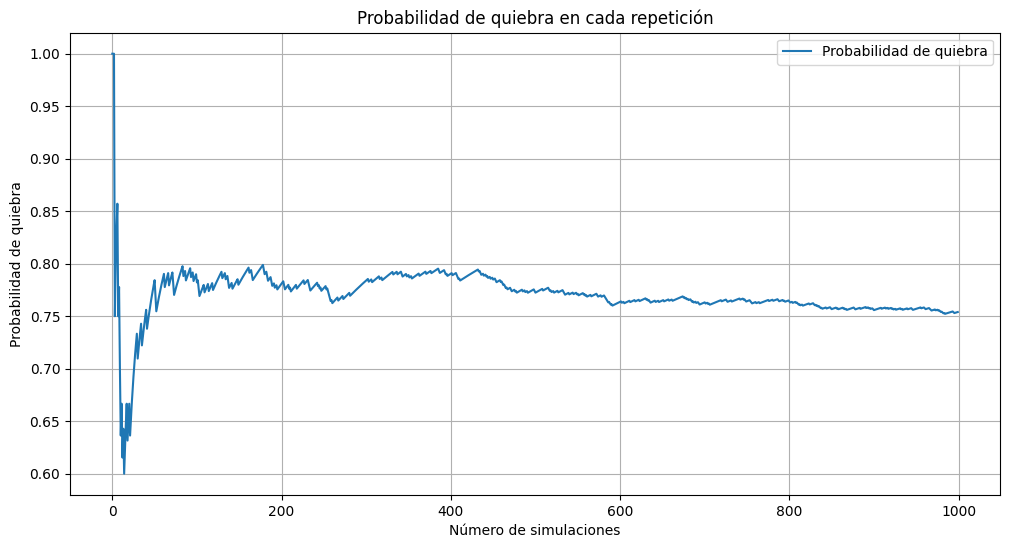

In [20]:
# Graficar la probabilidad de quiebra en cada repetición
plt.figure(figsize=(12, 6))
plt.plot(probabilidades_quiebra, label='Probabilidad de quiebra')
plt.xlabel('Número de simulaciones')
plt.ylabel('Probabilidad de quiebra')
plt.title('Probabilidad de quiebra en cada repetición')
plt.legend()
plt.grid(True)
plt.show()

Observamos que apartir de 400-500 repeticiones empieza a converger la probabilidad. Por lo tanto, redefiniremos num_simulaciones = 500

In [21]:
# Parámetros del problema
num_simulaciones = 500
capital_inicial = 20
capital_objetivo = 50
valor_apuesta = 1


In [22]:
# Estimar la probabilidad de quiebra
probabilidad_quiebra, probabilidades_quiebra = estimar_probabilidad_quiebra(num_simulaciones, capital_inicial, capital_objetivo, valor_apuesta)

# Imprimir la probabilidad de quiebra
print(f"La probabilidad de quiebra con un capital inicial de ${capital_inicial} es: {probabilidad_quiebra:.4f}")


La probabilidad de quiebra con un capital inicial de $20 es: 0.7480


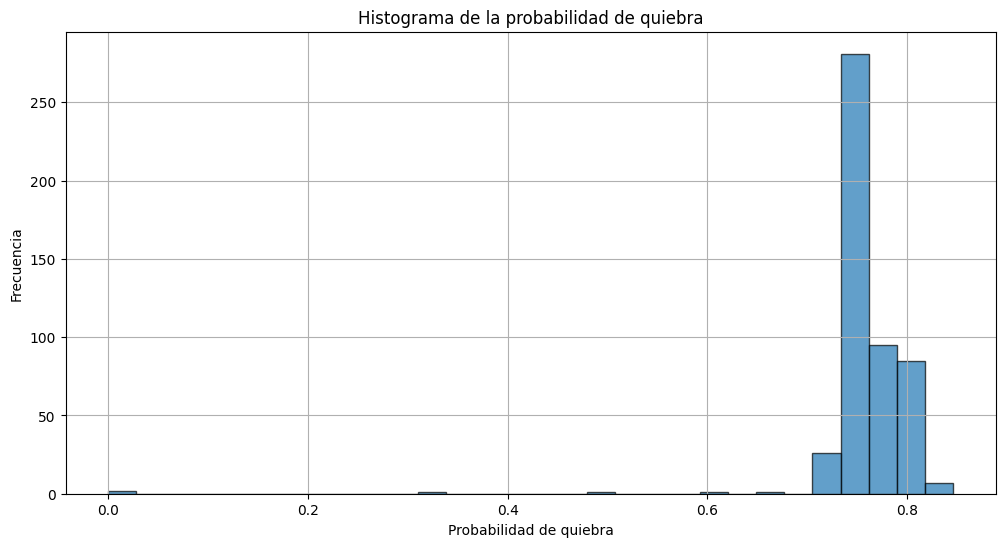

In [23]:
# Graficar el histograma de las probabilidades de quiebra
plt.figure(figsize=(12, 6))
plt.hist(probabilidades_quiebra, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Probabilidad de quiebra')
plt.ylabel('Frecuencia')
plt.title('Histograma de la probabilidad de quiebra')
plt.grid(True)
plt.show()